In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

**Imbalanced**

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

**Imbalanced**

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

**Nearly Imbalanced**

In [9]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

# **One hot encode Geography & Gender**

In [10]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [11]:
from sklearn.model_selection import train_test_split

X  = df.drop(columns = ['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# model = Sequential()
# model.add(Dense(3, activation = 'sigmoid', input_dim = 11))
# model.add(Dense(1, activation = 'sigmoid'))

# Uncomment this:
# Relu performs much better
# we can add more layers and neurons
# we can change the epochs
model = Sequential()
model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3289 - loss: 0.8535 - val_accuracy: 0.7987 - val_loss: 0.5214
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.5104 - val_accuracy: 0.7987 - val_loss: 0.4660
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4612 - val_accuracy: 0.7987 - val_loss: 0.4507
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.4415 - val_accuracy: 0.7987 - val_loss: 0.4408
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 0.4438 - val_accuracy: 0.7987 - val_loss: 0.4321
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.4316 - val_accuracy: 0.7987 - val_loss: 0.4242
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4309 - val_accuracy: 0.8019 - val_loss: 0.4174
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.4084 - val_accu

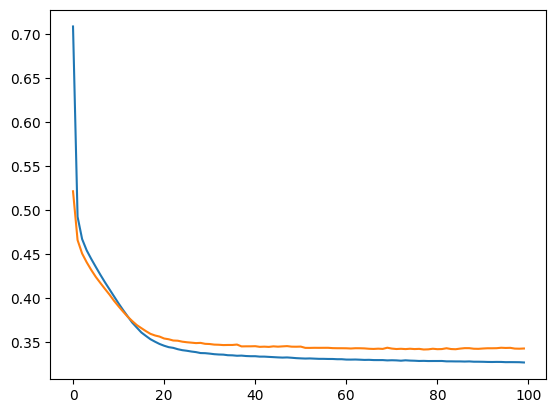

In [33]:
import matplotlib.pyplot as plt

# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

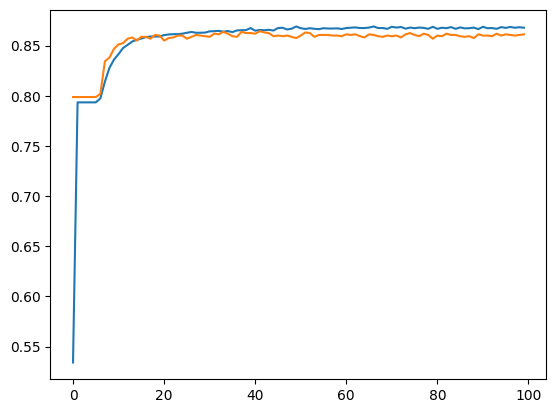

In [34]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:
model.layers[0].get_weights()

[array([[ 1.87362656e-01, -4.24254835e-01,  1.95532367e-01,
         -8.62829313e-02, -1.12347500e-02,  2.24721581e-01,
          1.13285944e-01,  3.58495206e-01, -1.06677212e-01,
         -6.95606172e-02,  5.97747751e-02],
        [ 7.59578228e-01, -1.01734579e+00, -1.31629586e+00,
         -1.11424792e+00, -3.20994198e-01, -9.35350716e-01,
         -7.57098198e-01, -7.23996878e-01,  7.41013736e-02,
         -9.15415645e-01, -3.02460045e-01],
        [ 1.87092513e-01, -3.85214627e-01,  4.97517735e-02,
          3.91244978e-01,  2.20363855e-01,  1.65259868e-01,
         -4.73098233e-02, -1.90224871e-02, -3.98953497e-01,
          1.93321183e-02, -2.44886894e-02],
        [ 2.68659294e-01, -1.48204654e-01,  6.90830529e-01,
          4.19734903e-02,  1.98410541e-01,  1.69763342e-01,
         -2.00857054e-02,  1.04062900e-01, -7.81520531e-02,
          9.40580443e-02,  6.66012943e-01],
        [ 3.55019838e-01,  5.48872530e-01,  1.80568337e-01,
          2.11985692e-01,  5.01029849e-01, -

**These are the weights and biases of layer 1**

In [36]:
model.layers[1].get_weights()

[array([[ 0.40475184, -0.47218534, -0.30069375,  0.38110587, -0.38828844,
          0.23908699,  0.41735804, -0.492657  ,  0.37883577, -0.6806174 ,
         -0.2004078 ],
        [-0.50131655, -0.18510488, -0.56053835,  1.0892087 ,  0.5544299 ,
          0.72238374, -0.09650377, -0.74254847,  0.25828052,  0.6024778 ,
          0.21055537],
        [-0.11339194, -1.9977624 , -0.3350921 ,  0.2551475 , -0.30183303,
         -0.10867336, -0.3103872 , -0.31562933,  0.76555806, -0.10296559,
         -1.7205701 ],
        [ 0.90534544, -0.42281622,  0.42800125, -0.23119253, -0.9832099 ,
         -0.46034512, -0.04185638, -0.6581668 , -0.30390817, -0.70284104,
          0.24499118],
        [ 0.20224115, -1.1384491 , -0.404382  ,  0.468371  , -0.02676359,
          0.07395281,  0.6973813 , -0.09542359,  0.57831556, -0.56968576,
         -0.4374478 ],
        [ 0.50567615, -0.07248604,  0.12808926, -0.6880408 , -0.5538466 ,
         -0.24280064, -0.84706426,  0.7844887 , -0.77656347, -0.6332128

**These are the weights and biases of layer 2**

In [37]:
model.layers[2].get_weights()

[array([[-1.0964714 ],
        [ 1.6716243 ],
        [ 0.9937638 ],
        [-0.7409372 ],
        [ 1.6940985 ],
        [-0.9297678 ],
        [-1.2001587 ],
        [ 1.2998216 ],
        [-0.81793183],
        [ 2.110767  ],
        [ 0.97798085]], dtype=float32),
 array([-0.14319758], dtype=float32)]

**These are the weights and biases of layer 3**

In [38]:
y_hat_probab = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


**These are the probablities, because we have used sigmoid, now we have to convert these probablities to 0/1**

In [39]:
y_hat = np.where(y_hat_probab > 0.5, 1, 0)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.8605

we have got an accuracy of 86%